# Decision tree

In [17]:
import importlib.machinery

loader = importlib.machinery.SourceFileLoader("data_import", "../../utils/data_import.py")
data_import = loader.load_module()

loader = importlib.machinery.SourceFileLoader("model_evaluator", "../../utils/model_evaluator.py")
model_evaluator = loader.load_module()

import numpy as np
import pandas as pd
from model_evaluator import metrics_function
import plotly.express as px

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [19]:
import matplotlib.pyplot as plt

In [20]:
# Import data
X_tot, df_tot, X_train, X_test, y_train, y_test = data_import.import_data_train_test("Contagio")

In [21]:
X_mal = np.copy(X_train[y_train==1])
y_mal = np.ones(X_mal.shape[0])

## Testing *random_state*

Test to determine the best value for *random_state* parameter

In [22]:
clf = DecisionTreeClassifier(random_state=0)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print("acc:", sum(kfold_scores_npv['test_f1_score'])/5)
print("fnr:", sum(kfold_scores_npv['test_false_neg'])/5)

acc: 0.9973549146821374
fnr: 0.0021396396396396395


In [23]:
clf = DecisionTreeClassifier()
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
print("acc:", sum(kfold_scores_npv['test_f1_score'])/5)
print("fnr:", sum(kfold_scores_npv['test_false_neg'])/5)

acc: 0.9974109202950752
fnr: 0.0021396396396396395


With random_state=0 is better

## Testing *criterion*

Test to determine the best value for *criterion* parameter

In [24]:
for crit in ["gini", "entropy", "log_loss"]:
    clf = DecisionTreeClassifier(random_state=0, criterion=crit)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
    print("Criterion: " + crit)
    print("acc:", sum(kfold_scores_npv['test_f1_score'])/5)
    print("fnr:", sum(kfold_scores_npv['test_false_neg'])/5)
    print("-----------------")

Criterion: gini
acc: 0.9973549146821374
fnr: 0.0021396396396396395
-----------------
Criterion: entropy
acc: 0.9974665789860824
fnr: 0.0024774774774774773
-----------------
Criterion: log_loss
acc: 0.9974665789860824
fnr: 0.0024774774774774773
-----------------


Gini is the better for `false negative rate`, but the other two are better for `accuracy`. Gini is choosen

## Testing *splitter*

Test to determine the best value for *splitter* parameter

In [25]:
for spli in ["best", "random"]:
    clf = DecisionTreeClassifier(random_state=0, splitter=spli)
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)
    print("Splitter: " + spli)
    print("acc:", sum(kfold_scores_npv['test_f1_score'])/5)
    print("fnr:", sum(kfold_scores_npv['test_false_neg'])/5)
    print("-----------------")

Splitter: best
acc: 0.9973549146821374
fnr: 0.0021396396396396395
-----------------
Splitter: random
acc: 0.996904594075507
fnr: 0.002702702702702703
-----------------


Best is choosen

## Testing *max_depth*

Test to determine the best value for *max_depth* parameter

In [26]:
fn = []
acc = []
k=5
for m in range(2,20,1):
    clf = DecisionTreeClassifier(random_state=0, max_depth=m)
    
    kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=k)
    
    acc.append(sum(kfold_scores_npv['test_accuracy_score'])/k)
    fn.append(sum(kfold_scores_npv['test_false_neg'])/k)

Printing `accuracy` and `false negative rate` on *trainig set* for different *max_depth*

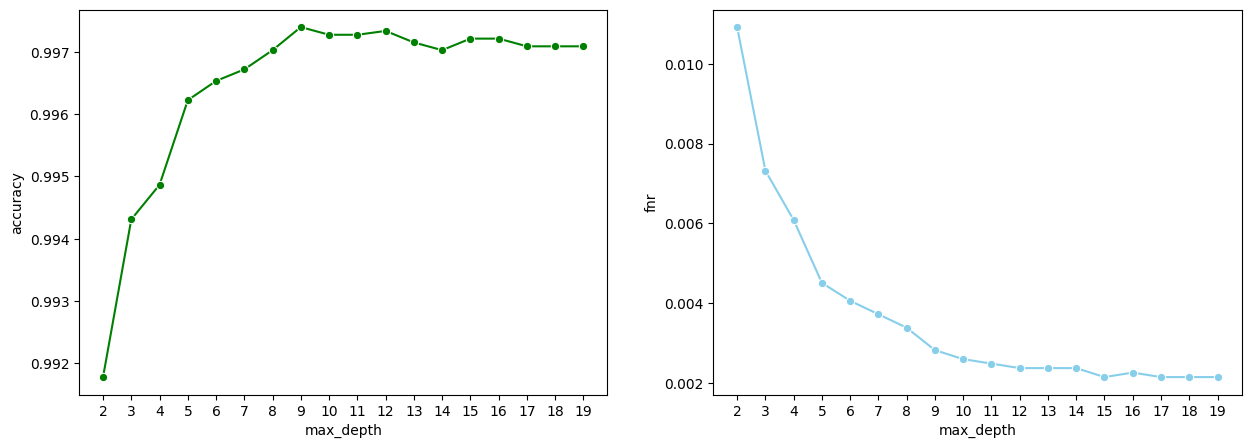

In [27]:
import seaborn as sns
x = np.arange(2, 20, 1)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
g_acc_2 = sns.lineplot(ax=axes[0], x=x, y=acc, marker="o", errorbar=None, legend=True, color='green')
g_fnr_2 = sns.lineplot(ax=axes[1], x=x, y=fn, marker="o", errorbar=None, legend=True, color='skyblue')
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('accuracy')
axes[1].set_xlabel('max_depth')
axes[1].set_ylabel('fnr')

axes[1].set_xticks(x)
axes[1].set_xticks(x)

plt.show()

Best *max_depth*: 15

In [28]:
for i in range(0, 18):
    print("Depth ",i+2)
    print("Accuracy: ",acc[i])
    print("False neg: ",fn[i])

Depth  2
Accuracy:  0.9917731510679237
False neg:  0.010923423423423423
Depth  3
Accuracy:  0.9943091698338925
False neg:  0.00731981981981982
Depth  4
Accuracy:  0.9948659665198927
False neg:  0.0060810810810810806
Depth  5
Accuracy:  0.9962267402813556
False neg:  0.0045045045045045045
Depth  6
Accuracy:  0.9965360505195244
False neg:  0.004054054054054054
Depth  7
Accuracy:  0.9967216557910739
False neg:  0.0037162162162162156
Depth  8
Accuracy:  0.9970309469005947
False neg:  0.0033783783783783786
Depth  9
Accuracy:  0.9974021191863974
False neg:  0.002815315315315315
Depth  10
Accuracy:  0.9972783950911298
False neg:  0.00259009009009009
Depth  11
Accuracy:  0.9972783568338338
False neg:  0.0024774774774774773
Depth  12
Accuracy:  0.9973402188814676
False neg:  0.0023648648648648646
Depth  13
Accuracy:  0.9971547092531582
False neg:  0.002364864864864865
Depth  14
Accuracy:  0.9970309469005947
False neg:  0.0023648648648648646
Depth  15
Accuracy:  0.997216552172144
False neg:  0.0

- 15 is the first best value of false rate
- 9  is the first best value of accuracy

## Final Testing

In [29]:
clf = DecisionTreeClassifier(random_state=0, max_depth=15)
kfold_scores_npv = model_evaluator.kfold_cross_validation(clf, X_train, y_train, k=5)

print("Train score")
#print("f1: ",sum(kfold_scores_npv['test_f1_score'])/5)
print("fnr: ",sum(kfold_scores_npv['test_false_neg'])/5)
print("acc: ",sum(kfold_scores_npv['test_accuracy_score'])/5)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
kfold_scores_npv = metrics_function(y_test, y_pred)
print("\nTest score")
#print("f1: ",kfold_scores_npv['f1_score'])
print("fnr: ",kfold_scores_npv['false_neg'])
print("acc: ",kfold_scores_npv['accuracy_score'])

Train score
fnr:  0.0021396396396396395
acc:  0.997216552172144

Test score
fnr:  0.0022522522522522522
acc:  0.9975259772389906


## Evasion

In [30]:
column_names = ["obj", "endobj", "stream", "endstream", "xref", "trailer", "startxref", "/Page", "/Encrypt", "/ObjStm", "/JS", "/JavaScript", "/AA", "/OpenAction", "/AcroForm", "/JBIG2Decode", "/RichMedia", "/Launch", "/EmbeddedFile", "/XFA", "/Colors"]

In [31]:
clf = DecisionTreeClassifier(random_state=0, max_depth=15)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=0)

Finding all the evadable pdfs of *training set*, and how many features are added complessively for all the evasions.

In [32]:
evaded=0
count=0
K = np.zeros(X_mal.shape[1])
for x_mal in X_mal:
    for dim in range(x_mal.shape[0]):
        Y = np.copy(x_mal)
        for i in range(1, 50):
            Y[dim] = Y[dim] + 1
            y_pred = clf.predict(Y.reshape(1,-1))

            if y_pred != 1:
                K[dim] += i
                evaded = 1
                break
    if evaded:
        count+=1
        evaded=0
K = K.astype(int)

In [33]:
print("Evadable ratio: ", count/X_mal.shape[0])

Evadable ratio:  0.9128378378378378


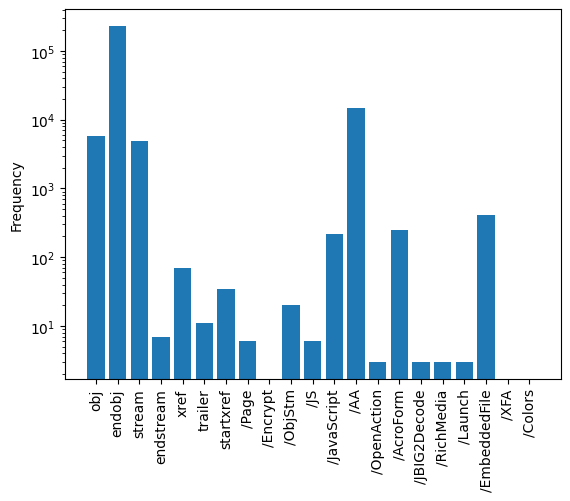

In [34]:
plt.bar(column_names, K)

plt.ylabel('Frequency')

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], column_names, rotation=90)
plt.yscale("log")

plt.show()

## Countermeasures

In [35]:
clf = DecisionTreeClassifier(random_state=0, max_depth=15)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=0)

For every evadable pdf another pdf is crafted, trying to build a training set immune from evasion. At each iteration the number of evadable pdfs decreases. 

In [36]:
X_train_improved = np.copy(X_train)
y_train_improved = np.copy(y_train)
bet_factor = X_mal.shape[0]
print("iteration 0 :", bet_factor)
count=1
fact = []
fact.append(bet_factor)
while True:
    matrix = []
    for x_mal in X_mal:
        evaded=0
        for dim in range(x_mal.shape[0]):
            Y = np.copy(x_mal)
            for i in range(1, 50):
                Y[dim] = Y[dim] + 1
                y_pred = clf.predict(Y.reshape(1,-1))
                if y_pred != 1:
                    Z = np.copy(Y)
                    matrix.append(Z)
                    evaded=1
                    break
            if evaded:
                break
    if len(matrix)==0:
        print("iteration", count, ": 0")
        count += 1
        break
    matrix = np.array(matrix)
    
    bet_factor = matrix.shape[0]
    print("iteration", count, ":", bet_factor)
    fact.append(bet_factor)
    
    X_train_improved = np.vstack((X_train_improved, matrix))
    y_train_improved = np.concatenate((y_train_improved, np.ones(matrix.shape[0])))
    
    clf.fit(X_train_improved, y_train_improved)
    count += 1

iteration 0 : 8880
iteration 1 : 8106
iteration 2 : 8106
iteration 3 : 8807
iteration 4 : 8113
iteration 5 : 8074
iteration 6 : 8088
iteration 7 : 8089
iteration 8 : 8850
iteration 9 : 8843
iteration 10 : 8863
iteration 11 : 6980
iteration 12 : 7349
iteration 13 : 683
iteration 14 : 666
iteration 15 : 511
iteration 16 : 8062
iteration 17 : 110
iteration 18 : 123
iteration 19 : 81
iteration 20 : 99
iteration 21 : 69
iteration 22 : 901
iteration 23 : 594
iteration 24 : 48
iteration 25 : 61
iteration 26 : 62
iteration 27 : 31
iteration 28 : 31
iteration 29 : 34
iteration 30 : 27
iteration 31 : 18
iteration 32 : 18
iteration 33 : 18
iteration 34 : 18
iteration 35 : 22
iteration 36 : 43
iteration 37 : 42
iteration 38 : 18
iteration 39 : 49
iteration 40 : 17
iteration 41 : 10
iteration 42 : 19
iteration 43 : 18
iteration 44 : 12
iteration 45 : 7
iteration 46 : 6
iteration 47 : 4
iteration 48 : 2
iteration 49 : 7
iteration 50 : 2
iteration 51 : 2
iteration 52 : 2
iteration 53 : 3
iteration 54

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]


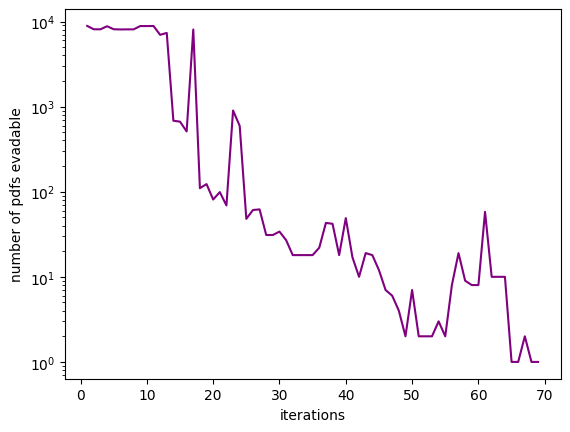

In [45]:
x = np.arange(1, count, 1)
y = fact

fig, ax = plt.subplots()

ax.plot(x, y, '-', color="purple")

ax.set_xlabel('iterations')
ax.set_ylabel('number of pdfs evadable')
ax.set_yscale("log")

plt.show()

In [46]:
Xy_train_improved = np.hstack((X_train_improved, y_train_improved.reshape(-1,1)))
df_improved = pd.DataFrame(Xy_train_improved, columns=df_tot.columns)

X_mal_improved = np.copy(X_train_improved[y_train_improved==1])

Num_of_pdf_start = X_train.shape[0]
Num_of_pdf_improved = X_train_improved.shape[0]
print("Number of pdfs at the beginning:", Num_of_pdf_start)
print("Number of pdfs after improving:", Num_of_pdf_improved)
print("Increasing factor of: %.2f" % (Num_of_pdf_improved/Num_of_pdf_start))
print("\n")

Num_mal = X_mal.shape[0]
Num_mal_improved = X_mal_improved.shape[0]
print("Number of malicious pdfs at the beginning:", Num_mal)
print("Number of malicious pdfs after improving:", Num_mal_improved)
print("Increasing factor of: %.2f" % (Num_mal_improved/Num_mal))
print("\n")

Number of pdfs at the beginning: 16167
Number of pdfs after improving: 127133
Increasing factor of: 7.86


Number of malicious pdfs at the beginning: 8880
Number of malicious pdfs after improving: 119846
Increasing factor of: 13.50


